In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
edges_to_add = None

In [5]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/cora_gcn_model.pth"
list_save_path = "../attacks/cora_gcn_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.759
Initial Loss: 1.9119181632995605


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

In [11]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.002245306968688965, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853367805480957, master_dirty_delta: -0.0007562637329101562
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -5.960464477539062e-07, master_dirty_delta: -4.76837158203125e-07
Attempt: 4, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0001329183578491211, master_dirty_delta: 0.0001327991485595703
Attempt: 18, Selected: 10
Attempt: 19, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.0035533905029296875, master_dirty_delta: 0.026262760162353516
Attempt: 35, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: 0.0028808116912841797, master_dirty_delta: 0.028925657272338867


Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022454261779785156, master_dirty_delta: -0.0022454261779785156
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961418151855469
Attempt: 14, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.007354736328125, master_dirty_delta: 0.03187823295593262
Attempt: 30, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: -0.0011061429977416992, master_dirty_delta: 0.026788949966430664
Attempt: 44, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: -0.006524920463562012, master_dirty_delta: 0.0208280086517334
Attempt: 57, Selected: 40
max_change: 0.0191191828250885, master_clean_delta: -0.013321161270141602, master_dirty_delta: 0.014525055885314941
Attempt: 68, Selected: 50
max_change: 0.0191191828250885, master_clean_delta: 0.00045418739318847656, master_dirty_delta: 0.02477443218231201
Attempt: 83, S

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961179733276367
Attempt: 14, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.009187102317810059, master_dirty_delta: 0.027801156044006348
Attempt: 30, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: 0.006200671195983887, master_dirty_delta: 0.025475263595581055
Attempt: 43, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: 0.002734661102294922, master_dirty_delta: 0.022288084030151367
Attempt: 58, Selected: 40
max_change: 0.0191191828250885, master_clean_delta: -0.0013763904571533203, master_dirty_delta: 0.02056121826171875
Attempt: 59, Selected: 40
max_change: 0.0191191828250885, master_clean_delta: 0.001785874366760254, master_dirty_delta: 0.023723483085632324
Attempt: 72, S

In [13]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

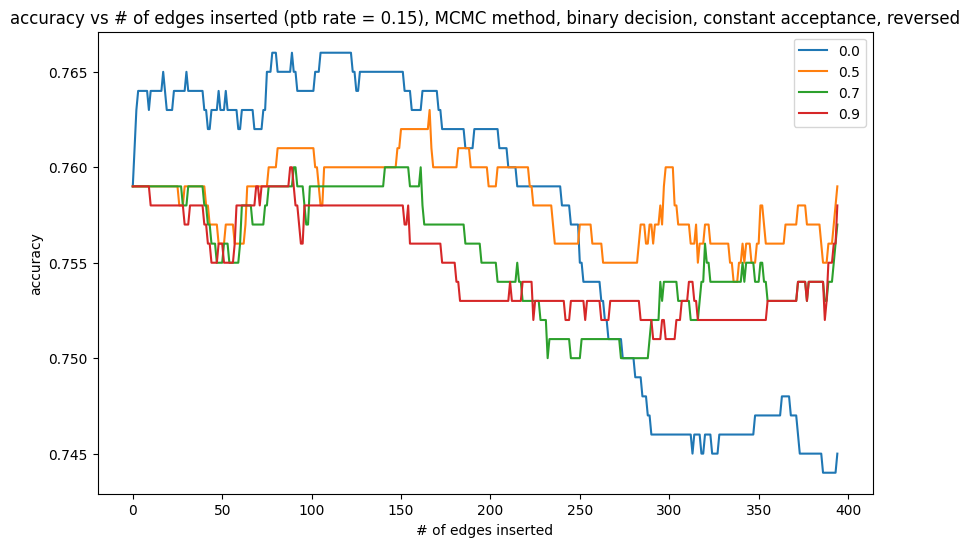

In [14]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

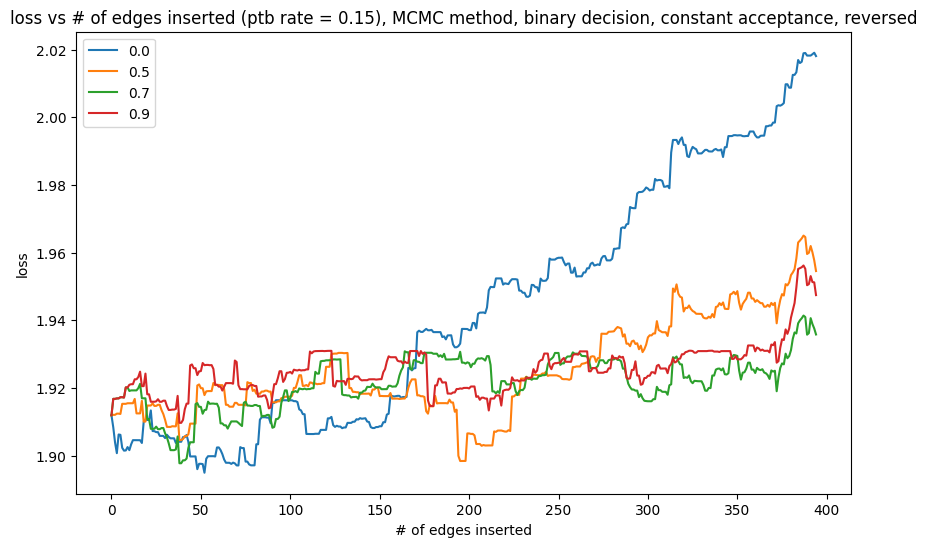

In [15]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [17]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: -0.0007561445236206055
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -3.5762786865234375e-07, master_dirty_delta: -1.1920928955078125e-07
Attempt: 4, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0001329183578491211, master_dirty_delta: 0.0001329183578491211
Attempt: 5, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 1.0132789611816406e-05
Attempt: 23, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.00045740604400634766, master_dirty_delta: -0.0007684230804443359
Attempt: 24, Selected: 

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.002245306968688965
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961418151855469
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: 1.1920928955078125e-07
Attempt: 19, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.0002111196517944336, master_dirty_delta: 0.0004953145980834961
Attempt: 48, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: 0.0003771781921386719, master_dirty_delta: 0.0008577108383178711
Attempt: 66, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: -0.00017976760864257812, master_dirty_delta: 0.0018538236618041992
Attempt: 86, Selected: 40
max_change: 0.0191191828250885, master_clean_delta: 0.0013216733932495117, master_dirty_delta: 0.0021736621856689453
Attempt: 101, Selecte

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.002245306968688965, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853367805480957, master_dirty_delta: 0.005961179733276367
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -1.1920928955078125e-07, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -3.5762786865234375e-07
Attempt: 4, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.00013303756713867188, master_dirty_delta: 0.00013303756713867188
Attempt: 5, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: 0.0002645254135131836
Attempt: 30, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: -9.012222290039062e-05, master_dirty_delta: 0.0004159212112426758
Attempt: 48, Selected:

In [18]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

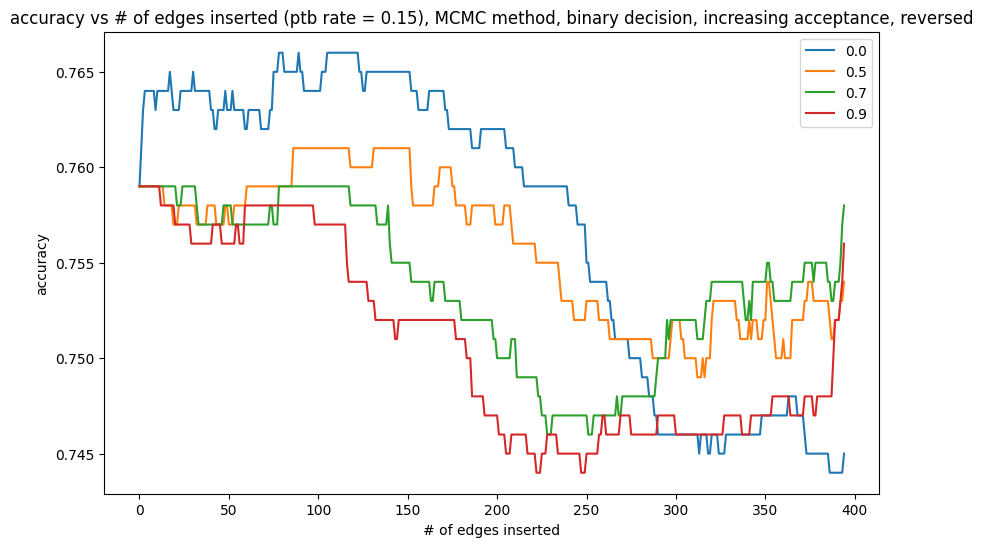

In [19]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

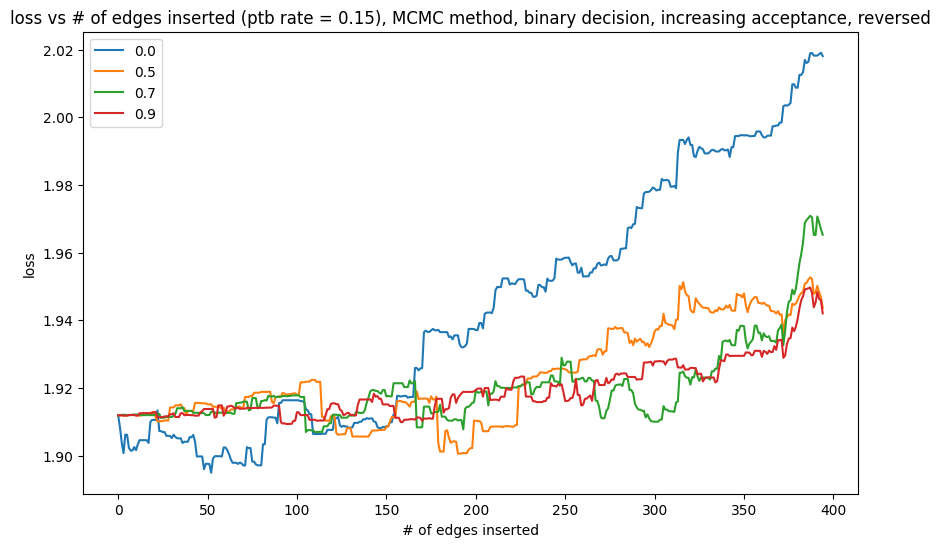

In [20]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [22]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.0022449493408203125
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: -0.0007561445236206055
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 1.1920928955078125e-07
Attempt: 22, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.0041648149490356445, master_dirty_delta: 0.027086853981018066
Attempt: 23, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.0004239082336425781, master_dirty_delta: 0.02432096004486084
Attempt: 24, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.00016498565673828125, master_dirty_delta: 0.02373218536376953
Attempt: 25, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.005370378494262695, master_dirty_delta: 0.02846193313

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.0022455453872680664
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961298942565918
Attempt: 15, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.007354736328125, master_dirty_delta: 0.03187918663024902
Attempt: 16, Selected: 10
Attempt: 17, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.007354736328125, master_dirty_delta: 0.03187894821166992
Attempt: 18, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.007358431816101074, master_dirty_delta: 0.0319141149520874
Attempt: 40, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.012278318405151367, master_dirty_delta: 0.039774417877197266
Attempt: 41, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.012773513793945312, master_dirty_delta: 0.03

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.0022450685501098633
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961298942565918
Attempt: 19, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.010713815689086914, master_dirty_delta: 0.029103636741638184
Attempt: 46, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.014827489852905273, master_dirty_delta: 0.03556704521179199
Attempt: 47, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.015953540802001953, master_dirty_delta: 0.03669309616088867
Attempt: 81, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: 0.018771767616271973, master_dirty_delta: 0.039104461669921875
Attempt: 139, Selected: 40
max_change: 0.019119181632995606, master_clean_delta: 0.015623688697814941, master_dirty_delta: 0.03955554962158203
At

In [23]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

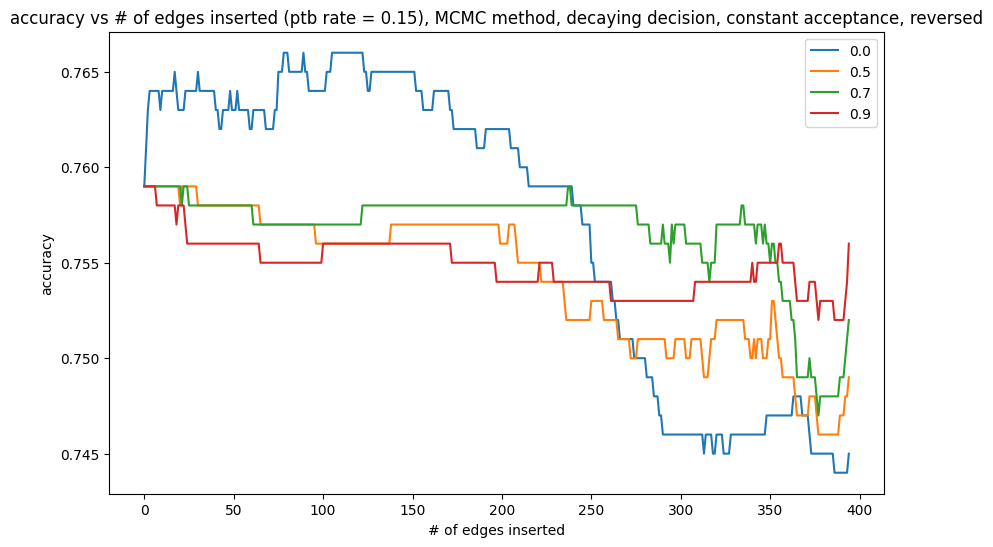

In [24]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

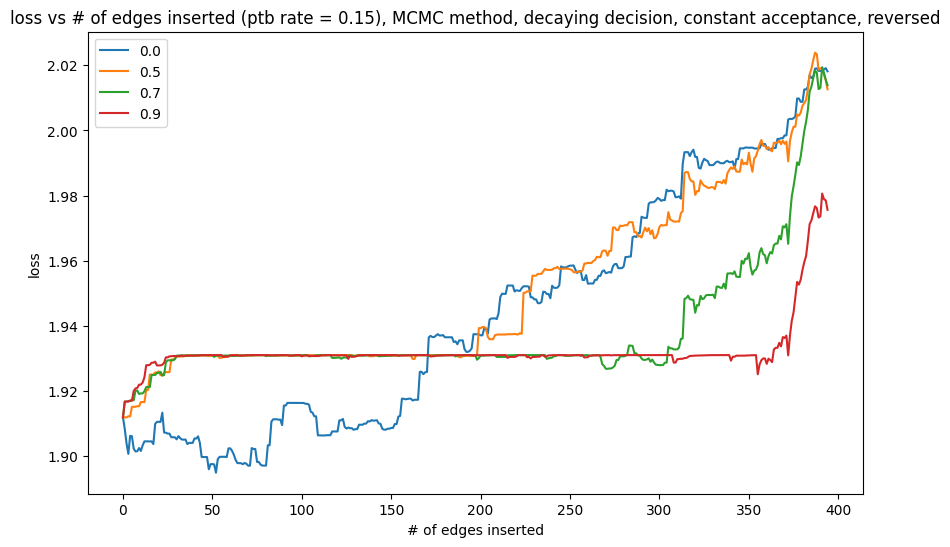

In [25]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [27]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.0022449493408203125
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: -0.0007561445236206055
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 1.1920928955078125e-07
Attempt: 24, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.000324249267578125, master_dirty_delta: -0.0006337165832519531
Attempt: 25, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.0012055635452270508, master_dirty_delta: 0.0015964508056640625
Attempt: 26, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.004065275192260742, master_dirty_delta: -0.0033996105194091797
Attempt: 27, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.0011276006698608398, master_dirty_delta: -0.0009795427322387695
At

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.002245306968688965, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853248596191406, master_dirty_delta: 0.0059615373611450195
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -1.1920928955078125e-07
Attempt: 4, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0001327991485595703, master_dirty_delta: 0.00013327598571777344
Attempt: 5, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -1.1920928955078125e-07, master_dirty_delta: 0.0002645254135131836
Attempt: 33, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: -9.250640869140625e-05, master_dirty_delta: 0.0010836124420166016
Attempt: 34, Selected:

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853248596191406, master_dirty_delta: 0.005961418151855469
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 45, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: -0.0009458065032958984, master_dirty_delta: -0.0033208131790161133
Attempt: 46, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: -6.699562072753906e-05, master_dirty_delta: 0.00043904781341552734
Attempt: 72, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: 0.0005995035171508789, master_dirty_delta: 0.001689314842224121
Attempt: 128, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: 0.0013852119445800781, master_dirty_delta: 0.00251162052154541
Attempt: 129, Selected: 30
max_change: 0.

In [28]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

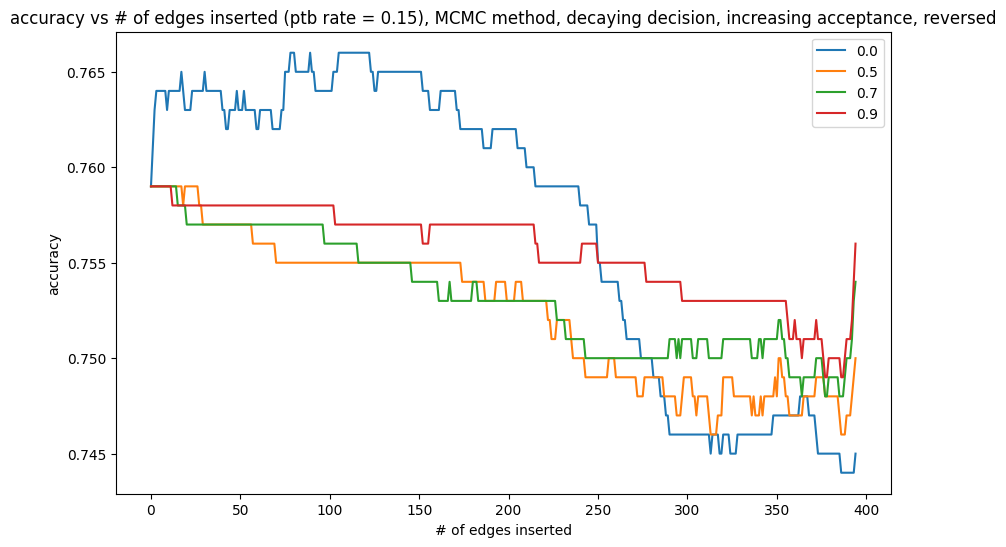

In [29]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

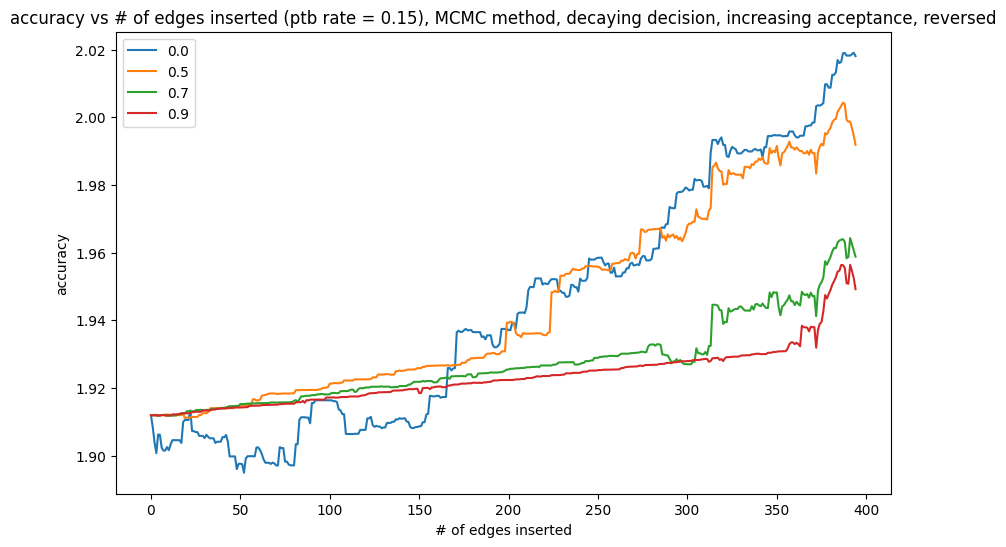

In [30]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [ ]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.0022455453872680664
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853487014770508, master_dirty_delta: -0.000756382942199707
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -4.76837158203125e-07
Attempt: 4, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.00013303756713867188, master_dirty_delta: 0.0001329183578491211
Attempt: 18, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.0035535097122192383, master_dirty_delta: 0.026262402534484863
Attempt: 34, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: -0.0025975704193115234, master_dirty_delta: 0.02349233627319336
Attempt: 35, Selected: 20

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119179248809813, master_clean_delta: -0.002244710922241211, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119179248809813, master_clean_delta: 0.00485384464263916, master_dirty_delta: 0.0059615373611450195
Attempt: 14, Selected: 10
max_change: 0.019119179248809813, master_clean_delta: 0.007355213165283203, master_dirty_delta: 0.03187847137451172
Attempt: 30, Selected: 20
max_change: 0.019119179248809813, master_clean_delta: -0.0011057853698730469, master_dirty_delta: 0.026789307594299316
Attempt: 45, Selected: 30
max_change: 0.019119179248809813, master_clean_delta: 0.001105666160583496, master_dirty_delta: 0.028458476066589355
Attempt: 58, Selected: 40
max_change: 0.019119179248809813, master_clean_delta: -0.005690336227416992, master_dirty_delta: 0.0221555233001709
Attempt: 59, Selected: 40
max_change: 0.019119179248809813, master_clean_delta: -0.0025281906127929688, master_dirty_delta: 0.025317668914794922

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961418151855469
Attempt: 14, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.00918734073638916, master_dirty_delta: 0.027801156044006348
Attempt: 30, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.0062007904052734375, master_dirty_delta: 0.025475263595581055
Attempt: 43, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: 0.011192798614501953, master_dirty_delta: 0.0302351713180542
Attempt: 56, Selected: 40
max_change: 0.019119181632995606, master_clean_delta: 0.005230903625488281, master_dirty_delta: 0.02633488178253174
Attempt: 71, Selected: 50
max_change: 0.019119181632995606, master_clean_delta: 0.010398507118225098, master_dirty_delta: 0.030609726905822754
Atte

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [ ]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

In [ ]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

In [ ]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [ ]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: -0.0007562637329101562
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 18, Selected: 10
Attempt: 19, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.00020778179168701172, master_dirty_delta: 0.0009766817092895508
Attempt: 41, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: -0.000578761100769043, master_dirty_delta: 0.00116729736328125
Attempt: 42, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.0011799335479736328, master_dirty_delta: 0.001371145248413086
Attempt: 62, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: -0.0008161067962646484, master_dirty_delta: 0.0015575885772705078
A

Peturbing graph...:   0%|          | 0/203 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961418151855469
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -4.76837158203125e-07
Attempt: 4, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.00013315677642822266, master_dirty_delta: 0.00013303756713867188
Attempt: 5, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 0.0002644062042236328
Attempt: 31, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.00010836124420166016, master_dirty_delta: 0.0010346174240112305
Attempt: 51, Selected: 20
max_

Peturbing graph...:   0%|          | 0/123 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.005961418151855469
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 19, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.00014340877532958984, master_dirty_delta: 0.000649571418762207
Attempt: 46, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: 0.001001119613647461, master_dirty_delta: 0.0015217065811157227
Attempt: 68, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: 0.00035381317138671875, master_dirty_delta: 0.00195467472076416
Attempt: 69, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: 0.00035381317138671875, master_dirty_delta: 0.001954793930053711
Attempt: 87, Selected: 40
max_change: 0.0191

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

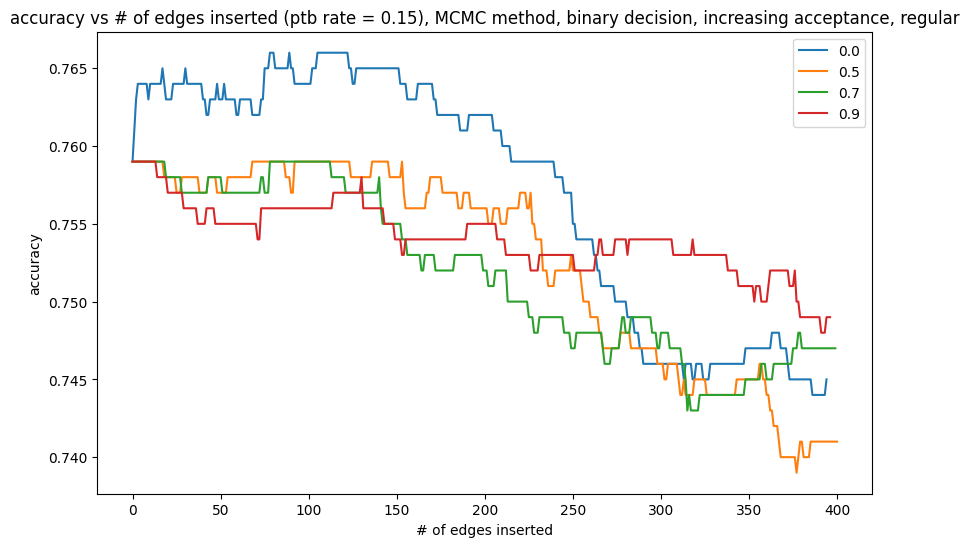

In [39]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

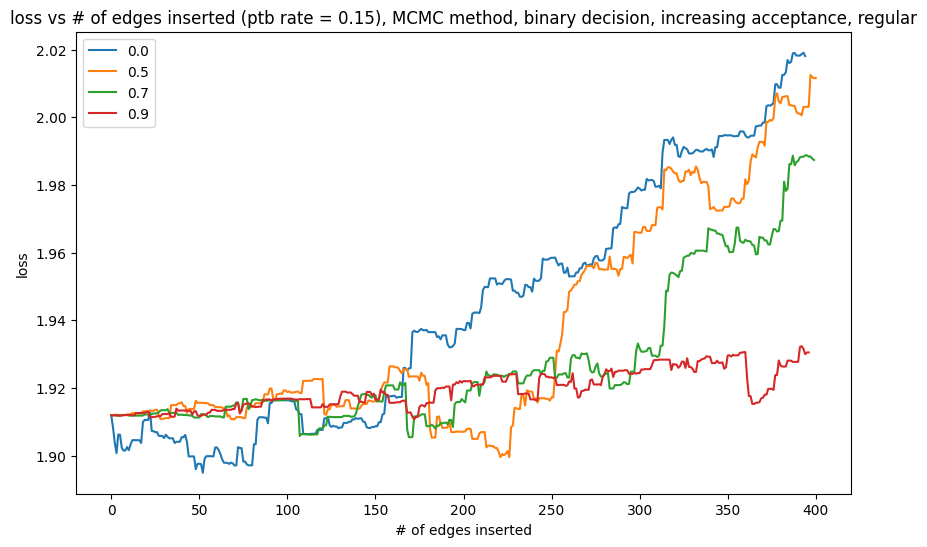

In [40]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [41]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.0022449493408203125
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853487014770508, master_dirty_delta: -0.0007560253143310547
Attempt: 2, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.0, master_dirty_delta: 1.1920928955078125e-07
Attempt: 21, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.0035552978515625, master_dirty_delta: 0.0261610746383667
Attempt: 22, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.0048334598541259766, master_dirty_delta: 0.02873051166534424
Attempt: 44, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: 0.014252305030822754, master_dirty_delta: 0.039234042167663574
Attempt: 68, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: 0.030886411666870117, master_dirty_delta: 0.055313944816589355
Attempt: 69, Selected: 30
max_ch

Peturbing graph...:   0%|          | 0/203 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.0191191828250885, master_clean_delta: 0.004853487014770508, master_dirty_delta: 0.00596165657043457
Attempt: 15, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.007354855537414551, master_dirty_delta: 0.03187966346740723
Attempt: 16, Selected: 10
Attempt: 17, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.007354855537414551, master_dirty_delta: 0.03187990188598633
Attempt: 18, Selected: 10
max_change: 0.0191191828250885, master_clean_delta: 0.007358074188232422, master_dirty_delta: 0.03191506862640381
Attempt: 42, Selected: 20
max_change: 0.0191191828250885, master_clean_delta: 0.010381579399108887, master_dirty_delta: 0.03675651550292969
Attempt: 68, Selected: 30
max_change: 0.0191191828250885, master_clean_delta: 0.017072439193725586, master_dirty_delta: 0.044483900070

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022449493408203125, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961418151855469
Attempt: 15, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.005295157432556152, master_dirty_delta: 0.006166219711303711
Attempt: 16, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.004460692405700684, master_dirty_delta: 0.005331754684448242
Attempt: 17, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.005741477012634277, master_dirty_delta: 0.006612062454223633
Attempt: 45, Selected: 20
max_change: 0.019119181632995606, master_clean_delta: 0.010410428047180176, master_dirty_delta: 0.012249946594238281
Attempt: 79, Selected: 30
max_change: 0.019119181632995606, master_clean_delta: 0.018793821334838867, master_dirty_delta: 0.021188735961914062


Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

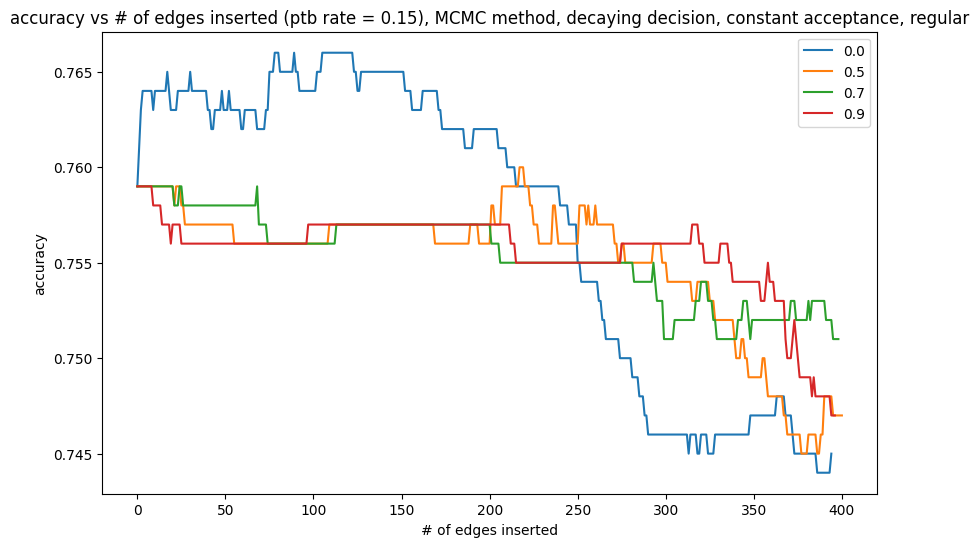

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

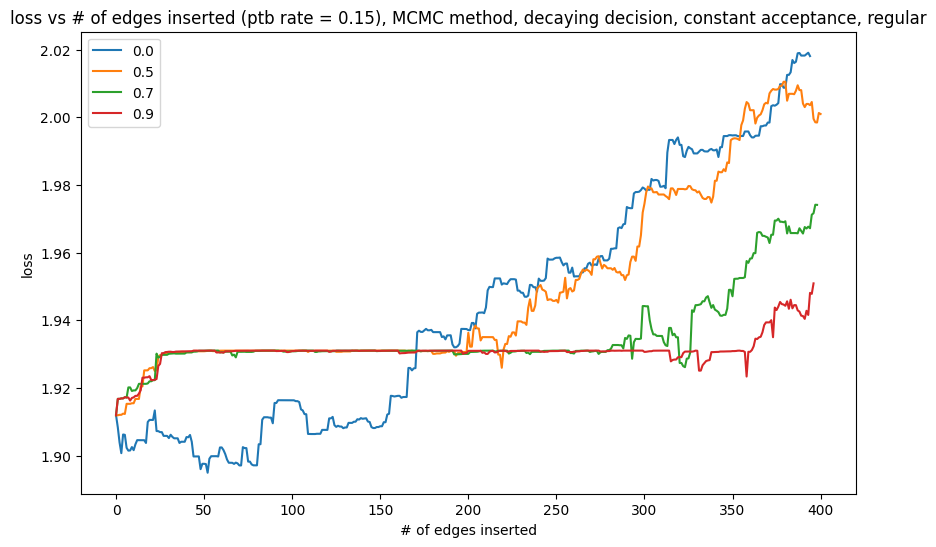

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [47]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245187759399414, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: -0.000756382942199707
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -3.5762786865234375e-07, master_dirty_delta: -4.76837158203125e-07
Attempt: 4, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.00013315677642822266, master_dirty_delta: 0.0001327991485595703
Attempt: 5, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: 1.0132789611816406e-05
Attempt: 33, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -9.238719940185547e-05, master_dirty_delta: 0.0016194581985473633
Attempt:

Peturbing graph...:   0%|          | 0/203 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.002245306968688965, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853367805480957, master_dirty_delta: 0.0059615373611450195
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -3.5762786865234375e-07, master_dirty_delta: 0.0
Attempt: 32, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -9.274482727050781e-05, master_dirty_delta: 0.0010848045349121094
Attempt: 33, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.006216168403625488, master_dirty_delta: -0.0034995079040527344
Attempt: 34, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: 0.0005967617034912109, master_dirty_delta: 0.00014734268188476562
Attempt: 35, Selected: 1

Peturbing graph...:   0%|          | 0/123 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -0.0022450685501098633, master_dirty_delta: -0.002245187759399414
Attempt: 1, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.004853606224060059, master_dirty_delta: 0.005961418151855469
Attempt: 2, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.0, master_dirty_delta: -1.1920928955078125e-07
Attempt: 3, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: -4.76837158203125e-07, master_dirty_delta: -3.5762786865234375e-07
Attempt: 4, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 0.00013315677642822266, master_dirty_delta: 0.00013303756713867188
Attempt: 5, Selected: 0
max_change: 0.019119181632995606, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0002645254135131836
Attempt: 45, Selected: 10
max_change: 0.019119181632995606, master_clean_delta: -0.0009458065032958984, master_dirty_delta: -0.0033211708068847656
Attempt

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [48]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"cora"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

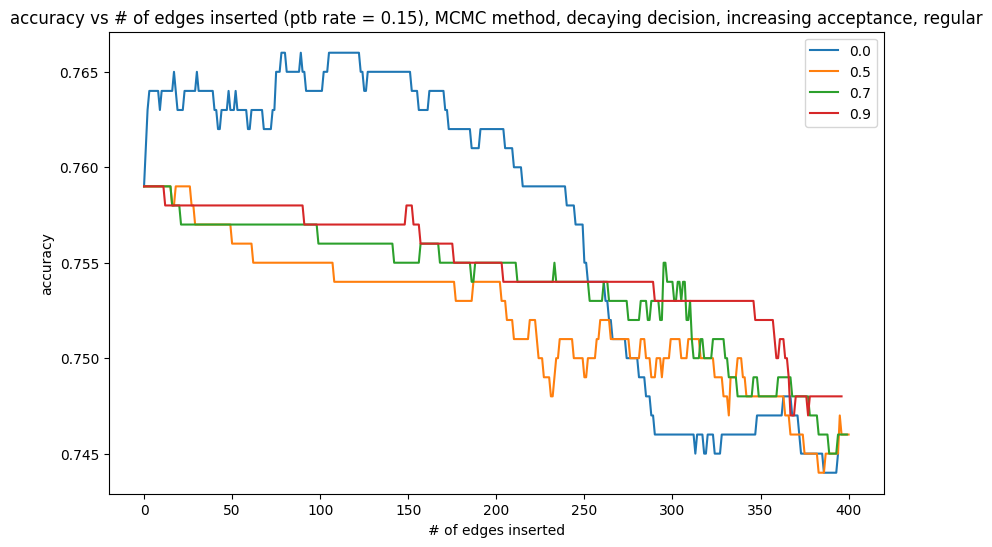

In [49]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

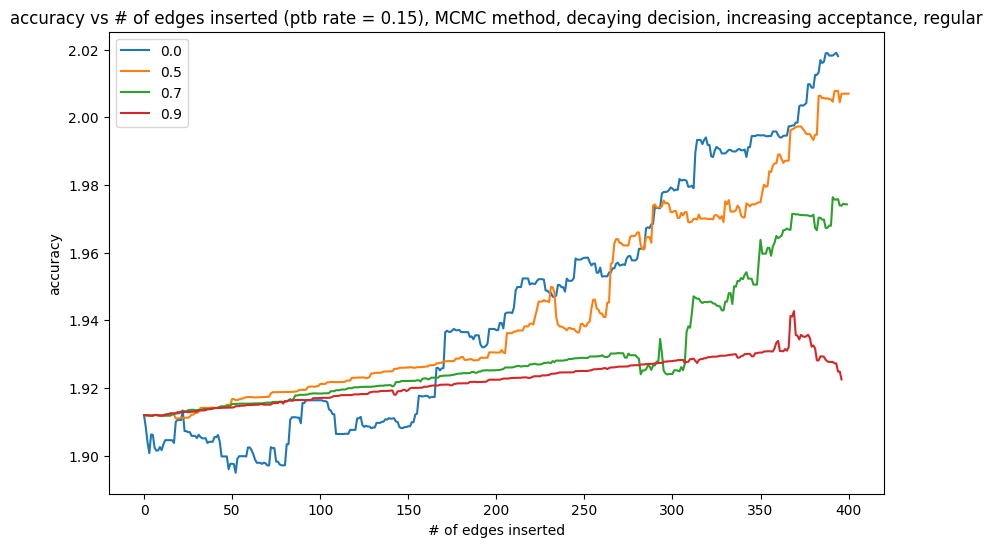

In [50]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")